# Data Loading

In [ ]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
pd.options.display.max_colwidth = 75
pd.options.display.max_columns = 20
np.set_printoptions(precision=4, suppress=True)

In [ ]:
# how colab open files:
# https://saturncloud.io/blog/how-to-use-google-colab-to-work-with-local-files/
# https://stackoverflow.com/questions/48376580/how-to-read-data-in-google-colab-from-my-google-drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
google_drive_path_header = '/content/drive/MyDrive/analytics_programming/'

Mounted at /content/drive


In [ ]:
!cat /content/drive/MyDrive/analytics_programming/examples/ex1.csv

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/analytics_programming/examples/ex1.csv")
df

a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo

In [ ]:
!cat examples/ex2.csv

cat: examples/ex2.csv: No such file or directory


In [ ]:
# pd.read_csv(google_drive_path_header+"examples/ex2.csv", header=None)
pd.read_csv(google_drive_path_header+"examples/ex2.csv", names=["a", "b", "c", "d", "message"])

a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo

In [ ]:
names = ["a", "b", "c", "d", "message"]
pd.read_csv(google_drive_path_header+"examples/ex2.csv", names=names, index_col="message")

a   b   c   d
message               
hello    1   2   3   4
world    5   6   7   8
foo      9  10  11  12

In [ ]:
!cat examples/csv_mindex.csv
parsed = pd.read_csv("/content/drive/MyDrive/analytics_programming/examples/csv_mindex.csv",
                     index_col=["key1", "key2"])
parsed

cat: examples/csv_mindex.csv: No such file or directory


value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

A table might not have a fixed delimiter, using whitespace or some other pattern to separate fields

In these cases, you can pass a regular expression as a delimiter for pandas.read_csv. This can be expressed by the regular expression \s+

In [ ]:
!cat /content/drive/MyDrive/analytics_programming/examples/ex3.txt

            A         B         C
aaa -0.264438 -1.026059 -0.619500
bbb  0.927272  0.302904 -0.032399
ccc -0.264273 -0.386314 -0.217601
ddd -0.871858 -0.348382  1.100491


In Textbook it is pd.read_csv("examples/ex3.txt", sep="\s+")

However Python 3 interprets string literals as Unicode strings, and therefore your \s is treated as an escaped Unicode character.

Declare your RegEx pattern as a raw string instead by prepending r, as below:

In [ ]:
result = pd.read_csv("/content/drive/MyDrive/analytics_programming/examples/ex3.txt", sep=r"\s+")
result

A         B         C
aaa -0.264438 -1.026059 -0.619500
bbb  0.927272  0.302904 -0.032399
ccc -0.264273 -0.386314 -0.217601
ddd -0.871858 -0.348382  1.100491

In [ ]:
!cat /content/drive/MyDrive/analytics_programming/examples/ex4.csv
pd.read_csv("/content/drive/MyDrive/analytics_programming/examples/ex4.csv", skiprows=[0, 2, 3])

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo

In [ ]:
!cat /content/drive/MyDrive/analytics_programming/examples/ex5.csv
result = pd.read_csv("/content/drive/MyDrive/analytics_programming/examples/ex5.csv",na_values=["NULL", "one", "two", "three"])
result

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo

something  a   b     c   d message
0        NaN  1   2   3.0   4     NaN
1        NaN  5   6   NaN   8   world
2        NaN  9  10  11.0  12     foo

In [ ]:
pd.isna(result)

something      a      b      c      d  message
0       True  False  False  False  False     True
1       True  False  False   True  False    False
2       True  False  False  False  False    False

https://www.geeksforgeeks.org/use-of-na_values-parameter-in-read_csv-function-of-pandas-in-python/

In [ ]:
result = pd.read_csv("/content/drive/MyDrive/analytics_programming/examples/ex5.csv", na_values=["NULL"])
result

something  a   b     c   d message
0        NaN  1   2   3.0   4     NaN
1        NaN  5   6   NaN   8   world
2        NaN  9  10  11.0  12     foo

###keep_default_na

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [ ]:
result2 = pd.read_csv("/content/drive/MyDrive/analytics_programming/examples/ex5.csv", keep_default_na=False)
result2
result2.isna()
# result3 = pd.read_csv("/content/drive/MyDrive/analytics_programming/examples/ex5.csv", keep_default_na=False,
#                       na_values=["NA"])
# result3
# result3.isna()

something      a      b      c      d  message
0      False  False  False  False  False    False
1      False  False  False  False  False    False
2      False  False  False  False  False    False

In [ ]:
sentinels = {"message": ["foo", "NA"], "something": ["two"]}
pd.read_csv("/content/drive/MyDrive/analytics_programming/examples/ex5.csv", na_values=sentinels,
            keep_default_na=False)

something  a   b   c   d message
0       one  1   2   3   4     NaN
1       NaN  5   6       8   world
2     three  9  10  11  12     NaN

In [ ]:
pd.options.display.max_rows = 20

In [ ]:
result = pd.read_csv("/content/drive/MyDrive/analytics_programming/examples/ex6.csv")
result

one       two     three      four key
0     0.467976 -0.038649 -0.295344 -1.824726   L
1    -0.358893  1.404453  0.704965 -0.200638   B
2    -0.501840  0.659254 -0.421691 -0.057688   G
3     0.204886  1.074134  1.388361 -0.982404   R
4     0.354628 -0.133116  0.283763 -0.837063   Q
...        ...       ...       ...       ...  ..
9995  2.311896 -0.417070 -1.409599 -0.515821   L
9996 -0.479893 -0.650419  0.745152 -0.646038   E
9997  0.523331  0.787112  0.486066  1.093156   K
9998 -0.362559  0.598894 -1.843201  0.887292   G
9999 -0.096376 -1.012999 -0.657431 -0.573315   0

[10000 rows x 5 columns]

In [ ]:
pd.read_csv("/content/drive/MyDrive/analytics_programming/examples/ex6.csv", nrows=5)

one       two     three      four key
0  0.467976 -0.038649 -0.295344 -1.824726   L
1 -0.358893  1.404453  0.704965 -0.200638   B
2 -0.501840  0.659254 -0.421691 -0.057688   G
3  0.204886  1.074134  1.388361 -0.982404   R
4  0.354628 -0.133116  0.283763 -0.837063   Q

chunksize.  int, optional
Number of lines to read from the file per chunk. Passing a value will cause the function to return a TextFileReader object for iteration. See the IO Tools docs for more information on iterator and chunksize.

In [ ]:
cat! /content/drive/MyDrive/analytics_programming/examples/ex6.csv

Streaming output truncated to the last 5000 lines.
0.467976300189,-0.0386485396255,-0.295344251987,-1.82472622729,1
-0.358893469543,1.40445260007,0.704964644926,-0.200638304015,Z
-0.50184039929,0.659253707223,-0.421690619312,-0.0576883018364,3
0.204886212202,1.07413396504,1.38836131252,-0.982404023494,H
0.354627914484,-0.133115852296,0.283762637978,-0.837062961653,B
1.81748001608,0.742272722638,0.419394843928,-2.25103520513,L
-0.776764319165,0.935517747061,-0.332871759623,-1.87564085416,O
-0.913134961617,1.53062351168,-0.572656719239,0.477252252981,8
0.358479538224,-0.49757199147,-0.367016188009,0.507701778685,W
-1.74087710829,-1.16041658062,-1.63783027929,2.17220101238,G
0.24056373835,-0.328249185208,1.25215525783,1.07279626643,Y
0.764018252198,1.16547617218,-0.639544262638,1.49525751956,S
0.571034923177,-0.310537224251,0.582437274651,-0.2987651796,E
2.31765810894,0.430709506296,-1.33421573445,0.199679483557,R
1.54777073472,-1.11975292512,-2.27763354506,0.329585909852,B
-1.31060811665

In [ ]:
chunker = pd.read_csv("/content/drive/MyDrive/analytics_programming/examples/ex6.csv", chunksize=1000)
type(chunker)

pandas.io.parsers.readers.TextFileReader

In [ ]:
chunker = pd.read_csv("/content/drive/MyDrive/analytics_programming/examples/ex6.csv", chunksize=1000)

tot = pd.Series([], dtype='int64')
for piece in chunker:
    print(piece)
    tot = tot.add(piece["key"].value_counts(), fill_value=0)

tot = tot.sort_values(ascending=False)

          one       two     three      four key
0    0.467976 -0.038649 -0.295344 -1.824726   L
1   -0.358893  1.404453  0.704965 -0.200638   B
2   -0.501840  0.659254 -0.421691 -0.057688   G
3    0.204886  1.074134  1.388361 -0.982404   R
4    0.354628 -0.133116  0.283763 -0.837063   Q
..        ...       ...       ...       ...  ..
995  2.311896 -0.417070 -1.409599 -0.515821   M
996 -0.479893 -0.650419  0.745152 -0.646038   H
997  0.523331  0.787112  0.486066  1.093156   D
998 -0.362559  0.598894 -1.843201  0.887292   W
999 -0.096376 -1.012999 -0.657431 -0.573315   K

[1000 rows x 5 columns]
           one       two     three      four key
1000  0.467976 -0.038649 -0.295344 -1.824726   T
1001 -0.358893  1.404453  0.704965 -0.200638   J
1002 -0.501840  0.659254 -0.421691 -0.057688   R
1003  0.204886  1.074134  1.388361 -0.982404   S
1004  0.354628 -0.133116  0.283763 -0.837063   B
...        ...       ...       ...       ...  ..
1995  2.311896 -0.417070 -1.409599 -0.515821   L
1996 -0

In [ ]:
tot[:10]

key
E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
M    338.0
J    337.0
F    335.0
K    334.0
H    330.0
dtype: float64

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/analytics_programming/examples/ex5.csv")
data

something  a   b     c   d message
0       one  1   2   3.0   4     NaN
1       two  5   6   NaN   8   world
2     three  9  10  11.0  12     foo

In [ ]:
data.to_csv("/content/drive/MyDrive/analytics_programming/examples/out.csv")
!cat /content/drive/MyDrive/analytics_programming/examples/out.csv

,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,foo


In [ ]:
import sys
data.to_csv(sys.stdout, sep="|")

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


In [ ]:
data.to_csv(sys.stdout, na_rep="NULL")

,something,a,b,c,d,message
0,one,1,2,3.0,4,This is invalid
1,two,5,6,This is invalid,8,world
2,three,9,10,11.0,12,foo


In [ ]:
data.to_csv(sys.stdout, index=False, header=False)

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


In [ ]:
data.to_csv(sys.stdout, index=False, columns=["a", "b", "c"])

a,b,c
1,2,3.0
5,6,
9,10,11.0


In [ ]:
!cat /content/drive/MyDrive/analytics_programming/examples/ex7.csv

"a","b","c"
"1","2","3"
"1","2","3"


In [ ]:
import csv
f = open("/content/drive/MyDrive/analytics_programming/examples/ex7.csv")
reader = csv.reader(f)

In [ ]:
for line in reader:
    print(line)
f.close()

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3']


In [ ]:
cat! /content/drive/MyDrive/analytics_programming/examples/ex7.csv

cat: '!': No such file or directory
"a","b","c"
"1","2","3"
"1","2","3"


In [ ]:
with open("/content/drive/MyDrive/analytics_programming/examples/ex7.csv") as f:
    lines = list(csv.reader(f))

In [ ]:
header, values = lines[0], lines[1:]

In [ ]:
data_dict = {h: v for h, v in zip(header, zip(*values))}
data_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

In [ ]:
obj = """
{"name": "Wes",
 "cities_lived": ["Akron", "Nashville", "New York", "San Francisco"],
 "pet": null,
 "siblings": [{"name": "Scott", "age": 34, "hobbies": ["guitars", "soccer"]},
              {"name": "Katie", "age": 42, "hobbies": ["diving", "art"]}]
}
"""

In [ ]:
import json
result = json.loads(obj)

print(type(result))
result

<class 'dict'>


{'name': 'Wes',
 'cities_lived': ['Akron', 'Nashville', 'New York', 'San Francisco'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 34, 'hobbies': ['guitars', 'soccer']},
  {'name': 'Katie', 'age': 42, 'hobbies': ['diving', 'art']}]}

In [ ]:
asjson = json.dumps(result)

print(type(asjson))
asjson

<class 'str'>


'{"name": "Wes", "cities_lived": ["Akron", "Nashville", "New York", "San Francisco"], "pet": null, "siblings": [{"name": "Scott", "age": 34, "hobbies": ["guitars", "soccer"]}, {"name": "Katie", "age": 42, "hobbies": ["diving", "art"]}]}'

In [ ]:
siblings = pd.DataFrame(result["siblings"], columns=["name", "age"])
siblings

name  age
0  Scott   34
1  Katie   42

In [ ]:
!cat /content/drive/MyDrive/analytics_programming/examples/example.json

[{"a": 1, "b": 2, "c": 3},
 {"a": 4, "b": 5, "c": 6},
 {"a": 7, "b": 8, "c": 9}]


In [ ]:
data = pd.read_json("/content/drive/MyDrive/analytics_programming/examples/example.json")
data

a  b  c
0  1  2  3
1  4  5  6
2  7  8  9

In [ ]:
data.to_json(sys.stdout)
data.to_json(sys.stdout, orient="records")

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]

In [ ]:
cat! /content/drive/MyDrive/analytics_programming/examples/fdic_failed_bank_list.html

cat: '!': No such file or directory
<!DOCTYPE html>
<!-- saved from url=(0057)https://www.fdic.gov/bank/individual/failed/banklist.html -->
<html lang="en-US"><!-- Content language is American English. --><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
<title>FDIC: Failed Bank List</title>
<!-- Meta Tags -->
<meta charset="UTF-8">
<!-- Unicode character encoding -->
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<!-- Turns off IE Compatiblity Mode -->
<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1">
<!-- Makes it so phones don't auto zoom out. -->
<meta name="author" content="DRR">
<meta http-equiv="keywords" name="keywords" content="banks, financial institutions, failed, failure, closing, deposits, depositors, banking services, assuming institution, acquiring institution, claims">
<!-- CSS -->
<link rel="stylesheet" type="text/css" href="./fdic_failed_bank_list_files/responsive.css">
<link rel="stylesheet" type="tex

In [ ]:
tables = pd.read_html("/content/drive/MyDrive/analytics_programming/examples/fdic_failed_bank_list.html")
len(tables)
failures = tables[0]
failures.head()

Bank Name             City  ST   CERT  \
0                   Allied Bank         Mulberry  AR     91   
1  The Woodbury Banking Company         Woodbury  GA  11297   
2        First CornerStone Bank  King of Prussia  PA  35312   
3            Trust Company Bank          Memphis  TN   9956   
4    North Milwaukee State Bank        Milwaukee  WI  20364   

                 Acquiring Institution        Closing Date       Updated Date  
0                         Today's Bank  September 23, 2016  November 17, 2016  
1                          United Bank     August 19, 2016  November 17, 2016  
2  First-Citizens Bank & Trust Company         May 6, 2016  September 6, 2016  
3           The Bank of Fayette County      April 29, 2016  September 6, 2016  
4  First-Citizens Bank & Trust Company      March 11, 2016      June 16, 2016

In [ ]:
close_timestamps = pd.to_datetime(failures["Closing Date"])
close_timestamps.dt.year.value_counts()

Closing Date
4    522
3     19
2      2
1      2
5      1
0      1
Name: count, dtype: int64

In [ ]:
cat! /content/drive/MyDrive/analytics_programming/datasets/mta_perf/Performance_MNR.xml

cat: '!': No such file or directory
<?xml  version="1.0" encoding="ISO-8859-1"?>
<PERFORMANCE>
<INDICATOR>
  <INDICATOR_SEQ>28445</INDICATOR_SEQ>
  <PARENT_SEQ></PARENT_SEQ>
  <AGENCY_NAME>Metro-North Railroad</AGENCY_NAME>
  <INDICATOR_NAME>On-Time Performance (West of Hudson)</INDICATOR_NAME>
  <DESCRIPTION>Percent of commuter trains that arrive at their destinations within 5 minutes and 59 seconds of the scheduled time. West of Hudson services include the Pascack Valley and Port Jervis lines. Metro-North Railroad contracts with New Jersey Transit to operate service on these lines.
</DESCRIPTION>
  <PERIOD_YEAR>2008</PERIOD_YEAR>
  <PERIOD_MONTH>1</PERIOD_MONTH>
  <CATEGORY>Service Indicators</CATEGORY>
  <FREQUENCY>M</FREQUENCY>
  <DESIRED_CHANGE>U</DESIRED_CHANGE>
  <INDICATOR_UNIT>%</INDICATOR_UNIT>
  <DECIMAL_PLACES>1</DECIMAL_PLACES>
  <YTD_TARGET>95.00</YTD_TARGET>
  <YTD_ACTUAL>96.90</YTD_ACTUAL>
  <MONTHLY_TARGET>95.00</MONTHLY_TARGET>
  <MONTHLY_ACTUAL>96.90</MONTHLY_ACTUAL>

In [ ]:
from lxml import objectify

path = "/content/drive/MyDrive/analytics_programming/datasets/mta_perf/Performance_MNR.xml"
with open(path) as f:
    parsed = objectify.parse(f)
root = parsed.getroot()

In [ ]:
cat! /content/drive/MyDrive/analytics_programming/datasets/mta_perf/Performance_MNR.xml

cat: '!': No such file or directory
<?xml  version="1.0" encoding="ISO-8859-1"?>
<PERFORMANCE>
<INDICATOR>
  <INDICATOR_SEQ>28445</INDICATOR_SEQ>
  <PARENT_SEQ></PARENT_SEQ>
  <AGENCY_NAME>Metro-North Railroad</AGENCY_NAME>
  <INDICATOR_NAME>On-Time Performance (West of Hudson)</INDICATOR_NAME>
  <DESCRIPTION>Percent of commuter trains that arrive at their destinations within 5 minutes and 59 seconds of the scheduled time. West of Hudson services include the Pascack Valley and Port Jervis lines. Metro-North Railroad contracts with New Jersey Transit to operate service on these lines.
</DESCRIPTION>
  <PERIOD_YEAR>2008</PERIOD_YEAR>
  <PERIOD_MONTH>1</PERIOD_MONTH>
  <CATEGORY>Service Indicators</CATEGORY>
  <FREQUENCY>M</FREQUENCY>
  <DESIRED_CHANGE>U</DESIRED_CHANGE>
  <INDICATOR_UNIT>%</INDICATOR_UNIT>
  <DECIMAL_PLACES>1</DECIMAL_PLACES>
  <YTD_TARGET>95.00</YTD_TARGET>
  <YTD_ACTUAL>96.90</YTD_ACTUAL>
  <MONTHLY_TARGET>95.00</MONTHLY_TARGET>
  <MONTHLY_ACTUAL>96.90</MONTHLY_ACTUAL>

In [ ]:
data = []

skip_fields = ["PARENT_SEQ", "INDICATOR_SEQ",
               "DESIRED_CHANGE", "DECIMAL_PLACES"]

for elt in root.INDICATOR:
    el_data = {}
    for child in elt.getchildren():
        if child.tag in skip_fields:
            continue
        el_data[child.tag] = child.pyval
    data.append(el_data)

In [ ]:
perf = pd.DataFrame(data)
perf.head()

AGENCY_NAME                        INDICATOR_NAME  \
0  Metro-North Railroad  On-Time Performance (West of Hudson)   
1  Metro-North Railroad  On-Time Performance (West of Hudson)   
2  Metro-North Railroad  On-Time Performance (West of Hudson)   
3  Metro-North Railroad  On-Time Performance (West of Hudson)   
4  Metro-North Railroad  On-Time Performance (West of Hudson)   

                                                                  DESCRIPTION  \
0  Percent of commuter trains that arrive at their destinations within 5 m...   
1  Percent of commuter trains that arrive at their destinations within 5 m...   
2  Percent of commuter trains that arrive at their destinations within 5 m...   
3  Percent of commuter trains that arrive at their destinations within 5 m...   
4  Percent of commuter trains that arrive at their destinations within 5 m...   

   PERIOD_YEAR  PERIOD_MONTH            CATEGORY FREQUENCY INDICATOR_UNIT  \
0         2008             1  Service Indicators         M              %   
1         2008             2  Service Indicators         M              %   
2         2008             3  Service Indicators         M              %   
3         2008             4  Service Indicators         M              %   
4         2008             5  Service Indicators         M              %   

  YTD_TARGET YTD_ACTUAL MONTHLY_TARGET MONTHLY_ACTUAL  
0       95.0       96.9           95.0           96.9  
1       95.0       96.0           95.0           95.0  
2       95.0       96.3           95.0           96.9  
3       95.0       96.8           95.0           98.3  
4       95.0       96.6           95.0           95.8

In [ ]:
perf2 = pd.read_xml(path)
perf2.head()

INDICATOR_SEQ  PARENT_SEQ           AGENCY_NAME  \
0          28445         NaN  Metro-North Railroad   
1          28445         NaN  Metro-North Railroad   
2          28445         NaN  Metro-North Railroad   
3          28445         NaN  Metro-North Railroad   
4          28445         NaN  Metro-North Railroad   

                         INDICATOR_NAME  \
0  On-Time Performance (West of Hudson)   
1  On-Time Performance (West of Hudson)   
2  On-Time Performance (West of Hudson)   
3  On-Time Performance (West of Hudson)   
4  On-Time Performance (West of Hudson)   

                                                                  DESCRIPTION  \
0  Percent of commuter trains that arrive at their destinations within 5 m...   
1  Percent of commuter trains that arrive at their destinations within 5 m...   
2  Percent of commuter trains that arrive at their destinations within 5 m...   
3  Percent of commuter trains that arrive at their destinations within 5 m...   
4  Percent of commuter trains that arrive at their destinations within 5 m...   

   PERIOD_YEAR  PERIOD_MONTH            CATEGORY FREQUENCY DESIRED_CHANGE  \
0         2008             1  Service Indicators         M              U   
1         2008             2  Service Indicators         M              U   
2         2008             3  Service Indicators         M              U   
3         2008             4  Service Indicators         M              U   
4         2008             5  Service Indicators         M              U   

  INDICATOR_UNIT  DECIMAL_PLACES YTD_TARGET YTD_ACTUAL MONTHLY_TARGET  \
0              %               1      95.00      96.90          95.00   
1              %               1      95.00      96.00          95.00   
2              %               1      95.00      96.30          95.00   
3              %               1      95.00      96.80          95.00   
4              %               1      95.00      96.60          95.00   

  MONTHLY_ACTUAL  
0          96.90  
1          95.00  
2          96.90  
3          98.30  
4          95.80

In [ ]:
frame = pd.read_csv("/content/drive/MyDrive/analytics_programming/examples/ex1.csv")
frame
frame.to_pickle("/content/drive/MyDrive/analytics_programming/examples/frame_pickle")

In [ ]:
cat! /content/drive/MyDrive/analytics_programming/examples/frame_pickle

cat: '!': No such file or directory
��d      �pandas.core.frame��	DataFrame���)��}�(�_mgr��pandas.core.internals.managers��BlockManager����pandas._libs.internals��_unpickle_block����numpy.core.numeric��_frombuffer���(�`                     	                     
                                                 ��numpy��dtype����i8�����R�(K�<�NNNJ����J����K t�bKK���C�t�R��builtins��slice���K KK��R�K��R�h�numpy.core.multiarray��_reconstruct���h�ndarray���K ��Cb���R�(KKK��h�O8�����R�(K�|�NNNJ����J����K?t�b�]�(�hello��world��foo�et�bhKKK��R�K��R���]�(�pandas.core.indexes.base��
_new_Index���h=�Index���}�(�data�h%h'K ��h)��R�(KK��h/�]�(�a��b��c��d��message�et�b�name�Nu��R�h?�pandas.core.indexes.range��
RangeIndex���}�(hON�start�K �stop�K�step�Ku��R�e��R��_typ��	dataframe��	_metadata�]��attrs�}��_flags�}��allows_duplicate_labels��sub.

In [ ]:
pd.read_pickle("/content/drive/MyDrive/analytics_programming/examples/frame_pickle")

a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo

In [ ]:
!rm examples/frame_pickle

rm: cannot remove 'examples/frame_pickle': No such file or directory


In [ ]:
fec = pd.read_parquet('/content/drive/MyDrive/analytics_programming/datasets/fec/fec.parquet')

In [ ]:
cat! /content/drive/MyDrive/analytics_programming/datasets/fec/fec.parquet

Streaming output truncated to the last 5000 lines.
B�|�!�P C�� 6�П7�
�� ��<y�y
�9�$�c�:���qsG�n|��a�P��$��#�f͒!��Ƈdt} �C�`3��4k�,�6ɐ�1�(7w��A6�����!>Ǆ�����e��.]�n"�H0BIo�!��0A�	#�G�._G��Q6'�f16(��'�B��	�E()�@|n�H�'�.C�xF�!a��ҕ��!B~��sl0A~�f�W�2tC�.C�����1@Io24�>�
�	v#P�`��"DȐ�|�v�׍@|���ǐ�_���"�놯@���D���_7��"���`�t%�3L�@��&�ˏ ]����E(X�_~	�,i�^~��!4H�/"�+F�W�@�
#�˗.]����O�@��%B��0>�vӕ�WR^�x
_�|��+X��v	�'аB�|���'!C���熡a�z���A�`{���O0^7F@^�t��S�P0B|�ы�������K�0?�|�
B������~#6�!?I� A��5H�Qs�W�`���Jz#�|x�uc��`�n��瘰@������7 %6h��`��"�O�$j�!����#������$H�$(�ȓ$H��K��#J|B�S5��9���@$L�Y��H�@7�ć05N2Q�Ĉ�[.��I6H��Q�Ĉ�'F�Qc$M��j�,���R5IQ�G�J��Ԉ�$H����H��H�y�%J�!�5JL�d #�I��I$O�1��߭�� Q3��$H����Hz<A�(8� %��4j� A��?%8p�Q�D
�$P��x����=�DR�@8��SR�%H��D
��GpLb�	�'J� �Qd��'j�<)���J�x��-�Od�I�$P� 1��$8n)yB0�@%j����@$l���FI$J

In [ ]:
print(fec)

           cmte_id    cand_id             cand_nm               contbr_nm  \
0        C00410118  P20002978  Bachmann, Michelle         HARVEY, WILLIAM   
1        C00410118  P20002978  Bachmann, Michelle         HARVEY, WILLIAM   
2        C00410118  P20002978  Bachmann, Michelle           SMITH, LANIER   
3        C00410118  P20002978  Bachmann, Michelle        BLEVINS, DARONDA   
4        C00410118  P20002978  Bachmann, Michelle      WARDENBURG, HAROLD   
...            ...        ...                 ...                     ...   
1001726  C00500587  P20003281         Perry, Rick    GORMAN, CHRIS D. MR.   
1001727  C00500587  P20003281         Perry, Rick     DUFFY, DAVID A. MR.   
1001728  C00500587  P20003281         Perry, Rick     GRANE, BRYAN F. MR.   
1001729  C00500587  P20003281         Perry, Rick      TOLBERT, DARYL MR.   
1001730  C00500587  P20003281         Perry, Rick  ANDERSON, MARILEE MRS.   

                contbr_city contbr_st contbr_zip  \
0                    MO

In [ ]:
xlsx = pd.ExcelFile("examples/ex1.xlsx")

In [ ]:
# %pip  install openpyxl

In [ ]:
xlsx.sheet_names

['Sheet1']

In [ ]:
xlsx.parse(sheet_name="Sheet1")

Unnamed: 0  a   b   c   d message
0           0  1   2   3   4   hello
1           1  5   6   7   8   world
2           2  9  10  11  12     foo

In [ ]:
xlsx.parse(sheet_name="Sheet1", index_col=0)

a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo

In [ ]:
frame = pd.read_excel("examples/ex1.xlsx", sheet_name="Sheet1")
frame

Unnamed: 0  a   b   c   d message
0           0  1   2   3   4   hello
1           1  5   6   7   8   world
2           2  9  10  11  12     foo

In [ ]:
writer = pd.ExcelWriter("examples/ex2.xlsx")
frame.to_excel(writer, "Sheet1")
writer.close()

/var/folders/sm/6hh71xpj4r7c9lxb8vs0sbjr0000gn/T/ipykernel_22876/4135277578.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  frame.to_excel(writer, "Sheet1")


In [ ]:
frame.to_excel("examples/ex2.xlsx")

In [ ]:
!rm examples/ex2.xlsx

In [ ]:
!rm -f examples/mydata.h5

If you see error

"""
ImportError: Missing optional dependency 'pytables'.  Use pip or conda to install pytables.
"""

Run:
%pip install tables

In [ ]:
frame = pd.DataFrame({"a": np.random.standard_normal(100)})
store = pd.HDFStore("examples/mydata.h5")
store["obj1"] = frame
store["obj1_col"] = frame["a"]
store

<class 'pandas.io.pytables.HDFStore'>
File path: examples/mydata.h5

In [ ]:
store["obj1"]

a
0   1.747234
1  -1.410246
2  -0.378242
3  -0.345821
4   0.380062
..       ...
95  0.131102
96 -0.697614
97  1.335649
98 -0.151039
99  0.442938

[100 rows x 1 columns]

In [ ]:
store.put("obj2", frame, format="table")
store.select("obj2", where=["index >= 10 and index <= 15"])
store.close()

In [ ]:
frame.to_hdf("examples/mydata.h5", "obj3", format="table")
pd.read_hdf("examples/mydata.h5", "obj3", where=["index < 5"])

/var/folders/sm/6hh71xpj4r7c9lxb8vs0sbjr0000gn/T/ipykernel_22876/2659235977.py:1: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  frame.to_hdf("examples/mydata.h5", "obj3", format="table")


ValueError: The file 'examples/mydata.h5' is already opened, but not in read-only mode (as requested).

In [ ]:
import os
os.remove("examples/mydata.h5")

In [ ]:
import requests
url = "https://api.github.com/repos/pandas-dev/pandas/issues"
resp = requests.get(url)
resp.raise_for_status()
resp

<Response [200]>

In [ ]:
type(resp)
# print(resp)

requests.models.Response

In [ ]:
data = resp.json()
print(data)
data[0]["title"]

[{'url': 'https://api.github.com/repos/pandas-dev/pandas/issues/59827', 'repository_url': 'https://api.github.com/repos/pandas-dev/pandas', 'labels_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/59827/labels{/name}', 'comments_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/59827/comments', 'events_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/59827/events', 'html_url': 'https://github.com/pandas-dev/pandas/issues/59827', 'id': 2531688536, 'node_id': 'I_kwDOAA0YD86W5oBY', 'number': 59827, 'title': 'ENH: Add parameter to read_html() that disables the _remove_whitespace() function', 'user': {'login': 'dstone42', 'id': 97193062, 'node_id': 'U_kgDOBcsMZg', 'avatar_url': 'https://avatars.githubusercontent.com/u/97193062?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/dstone42', 'html_url': 'https://github.com/dstone42', 'followers_url': 'https://api.github.com/users/dstone42/followers', 'following_url': 'https://api.github.com/users/ds

'ENH: Add parameter to read_html() that disables the _remove_whitespace() function'

In [ ]:
issues = pd.DataFrame(data, columns=["number", "title",
                                     "labels", "state"])
issues

number  \
0    59827   
1    59826   
2    59825   
3    59823   
4    59822   
5    59819   
6    59816   
7    59815   
8    59814   
9    59813   
10   59809   
11   59806   
12   59793   
13   59791   
14   59789   
15   59788   
16   59786   
17   59785   
18   59783   
19   59780   
20   59777   
21   59775   
22   59774   
23   59773   
24   59772   
25   59771   
26   59769   
27   59767   
28   59766   
29   59765   

                                                                         title  \
0   ENH: Add parameter to read_html() that disables the _remove_whitespace(...   
1           BUG: is_unique fails when using float128 indexes, since pandas 2.0   
2                     BUG: Index union with datetime64[us] dtype and frequency   
3           BUG: Empty column name in group dataframe when using pyarrow types   
4                      DOC: Emphasize team managed pandas in installation docs   
5             BLD/RLS: build wheels with released numpy/cython for Python 3.13   
6                                 Bump pypa/cibuildwheel from 2.20.0 to 2.21.0   
7                BUG: read_json silently ignores the dtype when engine=pyarrow   
8                                              ENH: Add kwargs to `Series.map`   
9                                                 CI: Debug failing ARM builds   
10  BUG: Fix from_records() column reorder issue, if columns!=None use pass...   
11  DOC: Separate Examples for String Methods (str.isalnum(), str.isalpha()...   
12                                                                     Fix doc   
13                               Fix doc errors for various datetime functions   
14                                               DOC: Intro to data structures   
15  DOC: Series.update throws a `FutureWarning` about `def[col] = df[col].m...   
16     ENH: Follow up to PR #59577, Series.str.get_dummies() raise on str type   
17                                                Assorted backports for 2.2.x   
18  DOC: Questions on Usage of *args, **kwargs, and inplace parameters in p...   
19  Consider moving pyarrow's pandas compatibility and conversion code to t...   
20  ENH: Add a clear option to interpret strings as Pandas dtypes specifica...   
21  BUG: pd.concat() cannot concatenate more than 3 mixed-frequency datafra...   
22                                REF: pass dtype explicitly to _from_sequence   
23                REF: pass dtype explicitly to _from_sequence inside pd.array   
24   BUG: tz-aware series with NaT raises exception on .to_numpy("datetime64")   
25           ENH: ArrowTemporalProperties' object has no attribute 'to_period'   
26  BUG: to_datetime raises "AttributeError: 'NoneType' object has no attri...   
27                                            Infer extensiondtype from scalar   
28                                                            Fix issue #47101   
29                       API: handling of missing values in Index.__contains__   

                                                                        labels  \
0   [{'id': 76812, 'node_id': 'MDU6TGFiZWw3NjgxMg==', 'url': 'https://api.g...   
1   [{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ==', 'url': 'https://api.g...   
2   [{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ==', 'url': 'https://api.g...   
3   [{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ==', 'url': 'https://api.g...   
4   [{'id': 134699, 'node_id': 'MDU6TGFiZWwxMzQ2OTk=', 'url': 'https://api....   
5   [{'id': 129350, 'node_id': 'MDU6TGFiZWwxMjkzNTA=', 'url': 'https://api....   
6   [{'id': 129350, 'node_id': 'MDU6TGFiZWwxMjkzNTA=', 'url': 'https://api....   
7                                                                           []   
8   [{'id': 76812, 'node_id': 'MDU6TGFiZWw3NjgxMg==', 'url': 'https://api.g...   
9   [{'id': 129350, 'node_id': 'MDU6TGFiZWwxMjkzNTA=', 'url': 'https://api....   
10  [{'id': 1465286368, 'node_id': 'MDU6TGFiZWwxNDY1Mjg2MzY4', 'url': 'http...   
11  [{'id': 134699, 'node_id': 'MDU6TGFiZW

In [ ]:
import sqlite3

query = """
CREATE TABLE test
(a VARCHAR(20), b VARCHAR(20),
 c REAL,        d INTEGER
);"""

con = sqlite3.connect("mydata.sqlite")
con.execute(query)
con.commit()

In [ ]:
data = [("Atlanta", "Georgia", 1.25, 6),
        ("Tallahassee", "Florida", 2.6, 3),
        ("Sacramento", "California", 1.7, 5)]
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"

con.executemany(stmt, data)
con.commit()

In [ ]:
cursor = con.execute("SELECT * FROM test")
rows = cursor.fetchall()
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

In [ ]:
cursor.description
pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

In [ ]:
import sqlalchemy as sqla
db = sqla.create_engine("sqlite:///mydata.sqlite")
pd.read_sql("SELECT * FROM test", db)

a           b     c  d
0      Atlanta     Georgia  1.25  6
1  Tallahassee     Florida  2.60  3
2   Sacramento  California  1.70  5

In [ ]:
!rm mydata.sqlite

# Vectorization and Functional Programming

Topics:

* Numpy & Vectorization
* Introduction of Functional Programming



## NumPy

### NumPy is fast
* NumPy internally stores data in a contiguous block of memory, independent of other built-in Python objects.
* NumPy’s library of algorithms written in the C language can operate on this memory without any type checking or other overhead.
* NumPy arrays also use much less memory than built-in Python sequences.
* NumPy operations perform complex computations on entire arrays without the need for Python for loops.

In [ ]:
import numpy as np
my_arr = np.arange(100000) # NumPy array
my_list = list(range(100000))
# print(my_arr)
print(my_list)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
# Time for NumPy operation
%time for _ in range(10): my_arr2 = my_arr * 2

CPU times: user 2.81 ms, sys: 113 µs, total: 2.93 ms
Wall time: 2.26 ms


In [ ]:
# Time for List operation
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 114 ms, sys: 3.06 ms, total: 117 ms
Wall time: 131 ms


- CPU Time: CPU or execution time, which measures how much time a CPU spent on executing a program
- Wall time: wall-clock time, which measures the total time to execute a program in a computer.

Compared to the CPU time, the wall-clock time is often longer because the CPU executing the measured program may also be executing other program's instructions at the same time.

#### numpy is 10 to 100 times faster than list operation.

In [ ]:
import numpy as np
# use list to create np.array
samplelist = [0, 1, 2, 3, 4]
arrld = np.array(samplelist)

# check the type
print(type(arrld))
print(arrld)
print(samplelist)

<class 'numpy.ndarray'>
[0 1 2 3 4]
[0, 1, 2, 3, 4]


## ndarray is for vectorized operations but list is not
* how to add 2 on every element in the array or list?

In [ ]:
# error
print(samplelist)
samplelist = samplelist + 2
print(samplelist)

[0, 1, 2, 3, 4]


TypeError: can only concatenate list (not "int") to list

In [ ]:
print(arrld + 2)
print(arrld)
print(arrld - 1)

[2 3 4 5 6]
[0 1 2 3 4]
[-1  0  1  2  3]


In [ ]:
arrld

array([0, 1, 2, 3, 4])

In [ ]:
arrld.append(1)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [ ]:
np.append(arrld, 1)

array([0, 1, 2, 3, 4, 1])

## NumPy ndarray
* Fast, flexible container for large datasets. Perform mathematical operations on blocks of data.
* It is a container for homogenous data, all its elements must be of same type. This is important for performance.
* Every array has a shape, a tuple indicating the size of each dimension, and a dtype, an object describing the data type of the array

In [ ]:
data = np.random.randn(2,3) #2 rows 3 columns
data

array([[-0.2047,  0.4789, -0.5194],
       [-0.5557,  1.9658,  1.3934]])

In [ ]:
data * 10

array([[-2.0471,  4.7894, -5.1944],
       [-5.5573, 19.6578, 13.9341]])

In [ ]:
data + data

array([[-0.4094,  0.9579, -1.0389],
       [-1.1115,  3.9316,  2.7868]])

In [ ]:
data.shape

(2, 3)

In [ ]:
data.dtype

dtype('float64')

In [ ]:
data.ndim

2

### How to create ndarray
* array - Will create an array out of a list. For list of lists, will create a higher-dimensional array.
* empty - Creates array without initializing values. May return uninitialized garbage values.
* zeros - Creates array initialized with zeroes.
* arange - Create array initialized with range of values.
* For empty and zeros, pass the size of the array. For creating multi-dimensional arrays, use tuples.

In [ ]:
data1 = [6, 4.5, 0, 8, 1]
arr1 = np.array(data1)
arr1

array([6. , 4.5, 0. , 8. , 1. ])

In [ ]:
data2 = [[1,2,3,4],[5,6,7,8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [ ]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
np.ones([2,4])

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [ ]:
np.empty((2,3,1)) #similar to ones, but doesn't initialize the values. The values are from the memory which is meaningless.

array([[[0.4094],
        [0.9579],
        [1.0389]],

       [[1.1115],
        [3.9316],
        [2.7868]]])

In [ ]:
np.arange(5)

array([0, 1, 2, 3, 4])

### NumPy Data Types
* dtype is a special object, containing information (metadata) the ndarray needs to interpret a chunk of memory as a particular data type.
* It makes numpy flexible to interact with data from other systems. They provide mapping directly to underlying disk or memory representations.
* This makes it easy to read & write binary streams of data to disk & connect to low-level language code like C.
* NumPy tries to infer a good data type for any array that it creates.
* The naming convention is type of data followed by number of bits per element. eg: int23, float64, etc.
<img src="https://tuku.vimsky.com/images/2018/02/numpy-ndarray-structure.png">
          

In [ ]:
arr1 = np.array([1,2,3], dtype = np.float64)
arr1

array([1., 2., 3.])

In [ ]:
arr2 = np.array([1,2,3], dtype = np.int32)
arr2

array([1, 2, 3], dtype=int32)

In [ ]:
arr1.dtype

dtype('float64')

In [ ]:
arr2.dtype

dtype('int32')

* Convert or cast an array from 1 dtype to another with *astype*.
* Directly used dtype of another array.
* May loss of data.
* Loss of data can also happen due to the nature of the data eg. string_ type
* If the casting may fail, then a ValueError will be raised.

In [ ]:
arr = np.array([1,2,3,4])
arr.dtype

dtype('int64')

In [ ]:
float_arr = arr.astype(np.float64)
float_arr

array([1., 2., 3., 4.])

In [ ]:
arr.astype(float_arr.dtype) # use another ndarray's type

array([1., 2., 3., 4.])

In [ ]:
arr = np.array([3.4, -1.4, -4.2, 0.4, 10.4])
arr.astype(np.int32) #loss of data

array([ 3, -1, -4,  0, 10], dtype=int32)

In [ ]:
strings = np.array(['1.23','-9.6','43'], dtype=np.bytes_)
print(strings) # binary(bytes) string in python3
strings.astype(float)

[b'1.23' b'-9.6' b'43']


array([ 1.23, -9.6 , 43.  ])

## Arithmetic with NumPy arrays
* Arrays help in expressing batch operations without writing 'for loops'.
* Arithemetic operations between equal sized arrays applies to <b>element-wise operations</b>.
* Scalar operations propogate the scalar argument to each element in the array.
* Comparisons between equal sized arrays yields boolean arrays.
* Operations between differently sized arrays is called broadcasting.

In [ ]:
arr = np.array([[1.,2.,3.],[4.,5.,6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [ ]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [ ]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
1 / arr

array([[1.    , 0.5   , 0.3333],
       [0.25  , 0.2   , 0.1667]])

In [ ]:
arr2 = np.array([[0., 4., 1.],[7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [ ]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

## Basic indexing and slicing
* 1d arrays are simple and work similarl to Python lists.

In [ ]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
arr[5]

5

In [ ]:
arr[5:8]

array([5, 6, 7])

* You can <b>assign a scalar value to a slice</b>, then that value is broadcasted to entire selection.
* Difference between lists and ndarrays is that array slices are **views to original arrays.**
* Data is NOT copied and modifications to the view will affect original array.

In [ ]:
arr[5:8] = -1

In [ ]:
arr

array([ 0,  1,  2,  3,  4, -1, -1, -1,  8,  9])

* A "bare" slice [:] will assign to all values in an array.

In [ ]:
arr[:] = 0
arr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

* If you want to make a copy, you have to explicitly call <b>copy()</b>.

In [ ]:
arr_copy = arr[5:8].copy()
arr_copy[:] = 12
print(arr)
print(arr_copy)

[-1 -1 -1]


* For higher dimension arrays, elements at each index are arrays and not scalars.
* Individual elements can be accessed recursively or through a comma seperated list.
* Axis 0 is rows and axis 1 is columns.

In [ ]:
arr2d  = np.array([[1,2,3],[4,5,6],[7,8,9]])
arr2d[2]

array([7, 8, 9])

In [ ]:
arr2d[0][2]

3

In [ ]:
arr2d[0,2]

np.int64(3)

* We can assign both scalar and array value to higher dimensional array.

In [ ]:
arr2d[0]

array([1, 2, 3])

In [ ]:
arr_copy = arr2d[0].copy()
arr2d[0] = 42 #assign scalar value to higher dimensional array
arr2d

array([[42, 42, 42],
       [ 4,  5,  6],
       [ 7,  8,  9]])

In [ ]:
arr2d[0]=arr_copy #assign array value to higher dimensional array
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### Slicing higher dimensional arrays
* A slice selects elements from the axis 0 or rows.
* To select multiple axis elements, we need to pass multiple slices.
* arr2d[row, column]

In [ ]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [ ]:
arr2d[1:, 1:] #still two dimensions

array([[5, 6],
       [8, 9]])

* When slicing like this, you always obtain array views of the same number of dimensions.
* By mixing integer indexes and slices, you get lower dimensional slices.

In [ ]:
arr2d[1,:3] #now it becomes one dimension, take the 1st row, then select :3 elements

array([4, 5, 6])

In [ ]:
arr2d[:3,2] #take :3 rows, then take the 2nd from every row

array([3, 6, 9])

* Assigning single value to a slice changes all the elements in the slice

In [ ]:
arr2d[:2,2] = 0
arr2d

array([[1, 2, 0],
       [4, 5, 0],
       [7, 8, 9]])

### Boolean Indexing
* Comparisons with Numpy arrays are also vectorized. so they result in a Boolean array.
* This array can also be passed when indexing the array.

In [ ]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names =='Bob'

array([ True, False, False,  True, False, False, False])

In [ ]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [ ]:
names[names != 'Bob']

array(['Joe', 'Will', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [ ]:
names[[False,  True,  True, False,  True,  True,  True]]

array(['Joe', 'Will', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [ ]:
# data = np.random.randn(7,4)
# data
data = np.arange(28)
print(data)
data = np.arange(28).reshape((7, 4))
data

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27]])

In [ ]:
data[names=='Bob']

array([[ 0,  1,  2,  3],
       [12, 13, 14, 15]])

In [ ]:
data[[ True, False, False,  True, False, False, False]]

array([[ 0,  1,  2,  3],
       [12, 13, 14, 15]])

* The boolean arrays must be of the same length as the array they are indexing.
* You can mix boolean arrays with slices or integers.

In [ ]:
data[names == 'Bob', 2:]

array([[ 2,  3],
       [14, 15]])

In [ ]:
data[names == 'Bob', 3]

array([ 3, 15])

#### To select outside a condition use the != operator or simply negate the condition using ~.
* The ~ operator can be usefule when you want to negate an already existing general condition.
* You can combine multiple conditions with arithematic operators & and |. Normal Python versions 'and' and 'or' do not work here.
* Boolean indexing always creates a copy of the data, even if it is unchanged.

In [ ]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [ ]:
data[~(names == 'Bob')]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27]])

In [ ]:
cond = names == 'Bob'
data[~cond]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27]])

In [ ]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [ ]:
data[mask]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

* Boolean indexing is simple because it works like a filter.
* Setting whole rows and columns using one-dimensional boolean array is also easy.

In [ ]:
data[data < 0] = 0
data

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27]])

In [ ]:
data[names != 'Joe'] = 7
data

array([[ 7,  7,  7,  7],
       [ 4,  5,  6,  7],
       [ 7,  7,  7,  7],
       [ 7,  7,  7,  7],
       [ 7,  7,  7,  7],
       [20, 21, 22, 23],
       [24, 25, 26, 27]])

### Fancy Indexing
* It is a term to describe indexing using integer arrays.
* We can use it to select subset of rows in particular order.
* Negative indices select rows from the end.

In [ ]:
arr = np.empty((8,4))

for i in range(8):
    arr[i] = i

arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [ ]:
arr[[0,2]]

array([[0., 0., 0., 0.],
       [2., 2., 2., 2.]])

In [ ]:
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

* Passing mutiple index arrays selects 1d array with each element belonging to a tuple of respective indices.
* Eg: [[1,5,7,2],[0,3,1,2]] will get elements (1,0), (5,3), (7,1), (2,2)
* Multiple indices always give a 1d array as a result.
* To get a rectangular subset, we need to use the indices as subset.
* Fancy Indexing always results in copy of data.

In [ ]:
arr = np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [ ]:
arr[[1,5,7,2],[0,3,1,2]] #choose the row 1,5,7,2, then choose 0,3,1,2 from the 4 rows respectively

array([4, 7, 5, 6])

In [ ]:
arr[[1, 5, 7, 2]]

array([[ 4,  5,  6,  7],
       [20, 21, 22, 23],
       [28, 29, 30, 31],
       [ 8,  9, 10, 11]])

In [ ]:
arr[[1,5,7,2]][:,[0,3,1,2]] # re-order by index 0 3 1 2

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

## Universal Functions
* Also called ufunc, is a function that performs element-wise operations on data in ndarrays.
* Can be thought as fast vectorized wrappers for simple functions.
* Unary ufuncs accept 1 array as input. Binary ufuncs take 2 arrays and return single array as result.

In [ ]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.sqrt(arr)

array([0.    , 1.    , 1.4142, 1.7321, 2.    , 2.2361, 2.4495, 2.6458,
       2.8284, 3.    ])

In [ ]:
np.exp(arr)

array([   1.    ,    2.7183,    7.3891,   20.0855,   54.5982,  148.4132,
        403.4288, 1096.6332, 2980.958 , 8103.0839])

In [ ]:
x = np.random.randn(8)
y = np.random.randn(8)

In [ ]:
x

array([ 0.0929,  0.2817,  0.769 ,  1.2464,  1.0072, -1.2962,  0.275 ,
        0.2289])

In [ ]:
y

array([ 1.3529,  0.8864, -2.0016, -0.3718,  1.669 , -0.4386, -0.5397,
        0.477 ])

In [ ]:
np.maximum(x,y)

array([ 1.3529,  0.8864,  0.769 ,  1.2464,  1.669 , -0.4386,  0.275 ,
        0.477 ])

In [ ]:
np.absolute(x)

array([0.0929, 0.2817, 0.769 , 1.2464, 1.0072, 1.2962, 0.275 , 0.2289])

In [ ]:
np.sum(x)

2.6049840944102227

In [ ]:
np.power(x, 2)

array([0.0086, 0.0794, 0.5914, 1.5536, 1.0144, 1.6802, 0.0756, 0.0524])

In [ ]:
z=np.arange(10)
np.power(-1, z)

array([ 1, -1,  1, -1,  1, -1,  1, -1,  1, -1])

* Some ufuncs can return multiple arrays. 'modf' is one example. It is the Numpy version of Python's divmod.
* It return fractional and integral parts of a floating point array.
* Ufuncs have optional 'out' argument. It allows them to operate in-place on arrays.

In [ ]:
remainder, whole_part = np.modf(arr)

In [ ]:
remainder

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
whole_part

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

## Array-Oriented Programming with Arrays
* We can use Numpy to express data processing tasks as concise array expressions and avoid writing loops.
* Vectorization is the practice of replacing explicit loops with array expressions.
* Vectorized array operation will often be 1 or 2 (or more) orders of magnitude faster than Python counterparts.

#### As a simple example, suppose we wished to evaluate the function sqrt(x^2 + y^2) across a regular grid of values. The np.meshgrid function takes two 1D arrays and produces two 2D matrices corresponding to all pairs of (x, y) in the two arrays

In [ ]:
points = np.arange(-5, 6, 0.01)
xs, ys = np.meshgrid(points, points)

In [ ]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 5.97,  5.97,  5.97, ...,  5.97,  5.97,  5.97],
       [ 5.98,  5.98,  5.98, ...,  5.98,  5.98,  5.98],
       [ 5.99,  5.99,  5.99, ...,  5.99,  5.99,  5.99]])

In [ ]:
xs

array([[-5.  , -4.99, -4.98, ...,  5.97,  5.98,  5.99],
       [-5.  , -4.99, -4.98, ...,  5.97,  5.98,  5.99],
       [-5.  , -4.99, -4.98, ...,  5.97,  5.98,  5.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  5.97,  5.98,  5.99],
       [-5.  , -4.99, -4.98, ...,  5.97,  5.98,  5.99],
       [-5.  , -4.99, -4.98, ...,  5.97,  5.98,  5.99]])

* Use the 2 arrays in the expression.
* Use matplotlib to create visualisations of this 2-D array.

In [ ]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.0711, 7.064 , 7.0569, ..., 7.7872, 7.7949, 7.8026],
       [7.064 , 7.0569, 7.0499, ..., 7.7808, 7.7885, 7.7962],
       [7.0569, 7.0499, 7.0428, ..., 7.7744, 7.7821, 7.7898],
       ...,
       [7.7872, 7.7808, 7.7744, ..., 8.4429, 8.4499, 8.457 ],
       [7.7949, 7.7885, 7.7821, ..., 8.4499, 8.457 , 8.4641],
       [7.8026, 7.7962, 7.7898, ..., 8.457 , 8.4641, 8.4711]])

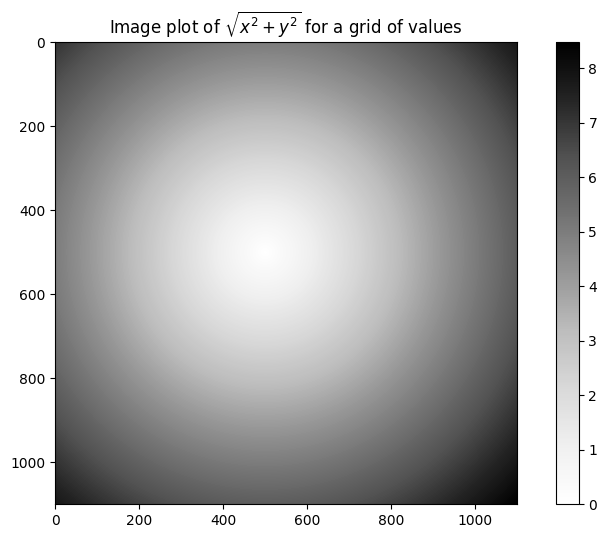

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.title(r"Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.imshow(z, cmap=plt.cm.Greys);plt.colorbar()


In [ ]:
z = xs - ys
z

array([[  0.  ,   0.01,   0.02, ...,  10.97,  10.98,  10.99],
       [ -0.01,   0.  ,   0.01, ...,  10.96,  10.97,  10.98],
       [ -0.02,  -0.01,   0.  , ...,  10.95,  10.96,  10.97],
       ...,
       [-10.97, -10.96, -10.95, ...,   0.  ,   0.01,   0.02],
       [-10.98, -10.97, -10.96, ...,  -0.01,   0.  ,   0.01],
       [-10.99, -10.98, -10.97, ...,  -0.02,  -0.01,   0.  ]])

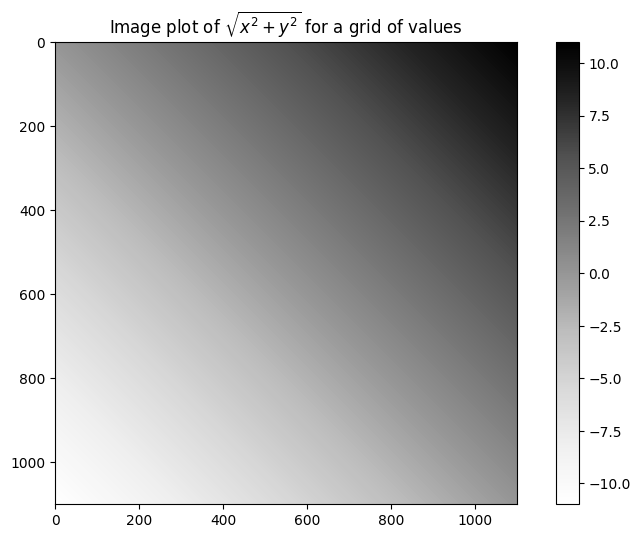

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.title(r"Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.imshow(z, cmap=plt.cm.Greys);plt.colorbar()

### Expressing Conditional Logic as Array Operations
* 'numpy.where' is vectorized version of ternary expression "x if condition else y".

In [ ]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

#### We want to take a value from arr or yarr based on the value in cond array.
#### Let's check a Python List comprehension first.

In [ ]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[np.float64(1.1),
 np.float64(2.2),
 np.float64(1.3),
 np.float64(1.4),
 np.float64(2.5)]

* It will not work for very large arrays as all work is being done in interpreted Python Code.
* It will not work with Multidimensional arrays.
* With np.where, this can be done very concisely.

In [ ]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

* Second and Third arguments do not need to be arrays, they can be scalars as well.
* Typical use is to produce new values based on another array.

In [ ]:
arr = np.random.randn(4,4)
arr

array([[ 3.2489, -1.0212, -0.5771,  0.1241],
       [ 0.3026,  0.5238,  0.0009,  1.3438],
       [-0.7135, -0.8312, -2.3702, -1.8608],
       [-0.8608,  0.5601, -1.2659,  0.1198]])

In [ ]:
arr > 0

array([[ True, False, False,  True],
       [ True,  True,  True,  True],
       [False, False, False, False],
       [False,  True, False,  True]])

In [ ]:
np.where(arr > 0, 2, -2)

array([[ 2, -2, -2,  2],
       [ 2,  2,  2,  2],
       [-2, -2, -2, -2],
       [-2,  2, -2,  2]])

In [ ]:
np.where(arr > 0, 2, arr)

array([[ 2.    , -1.0212, -0.5771,  2.    ],
       [ 2.    ,  2.    ,  2.    ,  2.    ],
       [-0.7135, -0.8312, -2.3702, -1.8608],
       [-0.8608,  2.    , -1.2659,  2.    ]])

## Mathematical and Statistical methods
* sum, mean, std, etc.

In [ ]:
arr = np.random.randn(5,4)
arr

array([[ 3.2489, -1.0212, -0.5771,  0.1241],
       [ 0.3026,  0.5238,  0.0009,  1.3438],
       [-0.7135, -0.8312, -2.3702, -1.8608],
       [-0.8608,  0.5601, -1.2659,  0.1198],
       [-1.0635,  0.3329, -2.3594, -0.1995]])

In [ ]:
arr.mean()

-0.32830574324498296

In [ ]:
np.mean(arr)

np.float64(-0.26636829967355924)

In [ ]:
arr.sum()

-6.566114864899659

In [ ]:
arr.std()

1.2602295733369913

#### Aggregation functions take an optional 'axis' argument that computes statistics over a given axis.
* 1 means Columns and 0 means Rows.

In [ ]:
arr = np.arange(8).reshape((2, 4))
print(arr)
arr.mean(axis=1)

[[0 1 2 3]
 [4 5 6 7]]


array([1.5, 5.5])

In [ ]:
arr.mean(axis=0)

array([2., 3., 4., 5.])

#### Some methods do not aggregate and instead produce array of intermediate results. eg - cumsum, cumprod.
* In multi-dimensional arrays, these same functions return an array of same size.
* They output has partial aggregates computed along the indicated axis.

In [ ]:
arr = np.array([0,1,2,3,45,6,7])
arr.cumsum()

array([ 0,  1,  3,  6, 51, 57, 64])

In [ ]:
arr = np.array([[0,1,2], [3,4,5], [6,7,8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [ ]:
arr.cumsum(axis=1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]])

### Methods for Boolean arrays
* Sum can often be used to count True values in a Boolean array.
* The method 'any' checks if 1 or more values in an array is True.
* The method 'all' checks if every value is True.
* This works with non-Boolean arrays, where non-zero elements evaluate to True.

In [ ]:
arr=np.random.randn(100)
arr

array([-1.542 , -0.9707, -1.307 ,  0.2863,  0.378 , -0.7539,  0.3313,
        1.3497,  0.0699,  0.2467, -0.0119,  1.0048,  1.3272, -0.9193,
       -1.5491,  0.0222,  0.7584, -0.6605,  0.8626, -0.01  ,  0.05  ,
        0.6702,  0.853 , -0.9559, -0.0235, -2.3042, -0.6525, -1.2183,
       -1.3326,  1.0746,  0.7236,  0.69  ,  1.0015, -0.5031, -0.6223,
       -0.9212, -0.7262,  0.2229,  0.0513, -1.1577,  0.8167,  0.4336,
        1.0107,  1.8249, -0.9975,  0.8506, -0.1316,  0.9124,  0.1882,
        2.1695, -0.1149,  2.0037,  0.0296,  0.7953,  0.1181, -0.7485,
        0.585 ,  0.1527, -1.5657, -0.5625, -0.0327, -0.929 , -0.4826,
       -0.0363,  1.0954,  0.9809, -0.5895,  1.5817, -0.5287,  0.457 ,
        0.93  , -1.5693, -1.0225, -0.4028,  0.2205, -0.1934,  0.6692,
       -1.649 , -2.2528, -1.1668,  0.3536,  0.7021, -0.2746, -0.1391,
        0.1077, -0.6065, -0.4171, -0.017 , -1.2241, -1.8008,  1.6347,
        0.989 ,  0.4579,  0.5552,  1.3067, -0.4406, -0.3014,  0.4988,
       -0.824 ,  1.3

In [ ]:
(arr>0).sum()

51

In [ ]:
(arr>0).any()

True

In [ ]:
(arr>0).all()

False

## Introduction of Functional Programming

* lambda
* map
* filter
* reduce


## The Lambda Expression

Lambda expressions - also known as "anonymous functions" - allow us to create and use a function in a single line. They are useful when we need a short function that will be used only once.

They are mostly used in conjunction with the map, filter and the sort methods, which we will see later in the article.

Let's write a function in Python, that will compute the value of 5x + 2. The standard approach would be to define a function.

In [ ]:
def f(x):
    """Function to compute the value of 5x+2"""
    return 5*x+2
f(3)

17

Now we would compute the same expression using Lambda functions. To create a lambda expression, we type in the keyword **lambda**, followed by the inputs. Next, we enter a colon followed by the expression that will be the return value.

In [ ]:
lambda x: 5*x+2

<function __main__.<lambda>(x)>

This lambda function will take the input x and return 5x + 2, just like the earlier function f. There is a problem, however.The **lambda** is not the name of the function. It is a Python keyword that says - what follows is an anonymous function. So how do we use it? One way is to give it a name.
Let us call this lambda expression **g**. Now, you can use this like any other function.

In [ ]:
g = lambda x: 5*x+2
g(3)

17

### Lambda expression with multiple inputs.

In [ ]:
# Calculating Harmonic Mean using lambda function
harmonic_mean = lambda x,y,z : 3/(1/x + 1/y + 1/z)**0.5
harmonic_mean(1,2,3)

2.215646837627989

### Lambda expression without inputs.
let's look at a common use of Lambda function where we do not assign it a name. Let's say we have a list of the first seven U.S Presidents and we'd like to sort this list by their last name. We shall create a Lambda function that extracts the last name, and uses that as the sorting value.

In [ ]:
# Sorting a List by thr last name using lambda expression

In [ ]:
presidents_usa = ["George Washington", "John Adams","Thomas Jefferson","James Madison","James Monroe","John Quincy Adams","Andrew Jackson"]

presidents_usa.sort(key = lambda name: name.split(" ")[-1].lower())
presidents_usa

['John Adams',
 'John Quincy Adams',
 'Andrew Jackson',
 'Thomas Jefferson',
 'James Madison',
 'James Monroe',
 'George Washington']

## The Map Function

The **map** function applies a function to every item of iterable, yielding the results. When used with lists, Map transforms a given list into a new list by applying the function to all the items in an input_list.

### Syntax
```
map(function_to_apply, iterables)
```

### Usage
Suppose we have a function that computes the volume of a cube, given the value of its edge(a)

In [ ]:
def volume(a):
    """volumne of a cube with edge 'a'"""
    return a**3

What if we need to compute the volumes for many different cubes with different edge lengths?

In [ ]:
# Edge length in cm
edges = [1,2,3,4,5]

There are two ways to do this. One by using the `direct method` and the other by using the `map` function.


In [ ]:
# Calculating the volume of given cubes using Direct Method

volumes = []
for a in edges:
    v = volume(a)
    volumes.append(v)


volumes

[1, 8, 27, 64, 125]

Now let's see how we can accomplish this task using a single line of code with the map function.

In [ ]:
# Calculating the volume of given cubes using the Map function

map(volume,edges)


The map function takes in two arguments.
The first is a function, and the second is your list, tuple, or any other iterable object. Here, the map function applies the volume function to each element in the list.

However, an important thing to note here is that the output of the map function is not a list but a map object, which is actually an iterator over the results. We can, however, turn this into a list by passing the map to the list constructor.

In [ ]:
list(map(volume,edges))

[1, 8, 27, 64, 125]

### Example

Let's now see an example which demonstrates the use of `lambda` function with the `map` function. We have a list of tuples containing name and heights for 5 people. Each of the height is in centimeters and we need to convert it into feet.

We will first write a converter function using a lambda expression which will accept a tuple as the input and will return a tuple with the same name.

In [ ]:
# Convert height from cms to feet : 1 cm = 0.0328 feet
height_in_cms = [('Tom',183),('Daisy',171),('Margaret',179),('Michael',190),('Nick',165)]

#Writing Convertor function using lambda expression
height_in_feet = lambda data: (data[0],round(data[1]*0.0328,1))

#Using the 'Map' function
list(map(height_in_feet,height_in_cms))

[('Tom', 6.0),
 ('Daisy', 5.6),
 ('Margaret', 5.9),
 ('Michael', 6.2),
 ('Nick', 5.4)]

### Calling map() With Multiple Iterables

### Syntax
```
map(<f>, <iterable_1>, <iterable_2>, ..., <iterable_n>)
```

In [ ]:
list(map(lambda a, b, c: a+b+c, [1, 2, 3], [10, 20, 30], [100, 200, 300]))

[111, 222, 333]

![image.png](attachment:image.png)

## The Filter Function

The `filter` function constructs an iterator from those elements of iterable for which function returns true. This means filter function is used to select certain pieces of data from a list, tuple, or other collection of data, hence the name.

### Syntax

```
filter(filter(function, iterable)
```

### Usage

Let's see an example where we want to get the list of all numbers that are greater than 5, from a given input list.

In [ ]:
# Filter out all the numbers greater than 5 from a list

my_list = [1,2,3,4,5,6,7,8,9]
output_list = filter(lambda x : x>5, my_list)

list(output_list)

[6, 7, 8, 9]

### Example

Here is a list containing some of the countries in Asia. Notice there are numerous strings that are empty. We'll use the filter function to remove these missing values. We'll simply pass none as the first argument and the second argument is the list of data as before.

In [ ]:
# Removing missing values from a list

countries_asia = ["Afghanistan","","Bhutan","","China","","Georgia","","","India"]

list(filter(None,countries_asia))

['Afghanistan', 'Bhutan', 'China', 'Georgia', 'India']

This filters out all values that are treated as false in a boolean setting.

## The Reduce Function

The `Reduce` function is a bit unusual and in fact, as of Python 3, it is no longer a built-in function. Instead, it has been moved to the functools module.

The 'reduce' function transforms a given list into a single value by applying a function cumulatively to the items of sequence, from left to right,

### Syntax

```
reduce(func, seq)
```
where reduce continually applies the function func() to the sequence seq and returns a single value.

### Usage
Let's illustrate the working of the reduce function with the help of a simple example that computes the product of a list of integers.

In [ ]:
# Compute the product of a list of integers using 'reduce'function

from functools import reduce
product = reduce((lambda x,y : x*y), [1,2,3,4,5])

product

120

The following diagram shows the intermediate steps of the calculation:
![](https://cdn-images-1.medium.com/max/800/1*tFi8CEmD3eAPwP3_nHWaTg.png)

The above program can also be written with an explicit for loop which is more clear.Hence Use functools.reduce if you really need it


In [ ]:
# Compute the product of a list of integers using a 'For' loop

product = 1
list = [1,2,3,4,5]
for num in list:
    product = product*num

product

120

### Example

The `reduce` function can determine the maximum of a list containing integers in a single line of code. There does exist a built-in function called `max()` in Python which is normally used for this purpose as `max(list_name)`.

In [ ]:
# Determining the maximum number in a given list

from functools import reduce
f = lambda a,b : a if (a>b) else b
reduce(f,[58,69,12,158,698])

698

## List Comprehensions: Alternative to map, filter and reduce

**List comprehension** is a way to define and create lists in Python. in most cases, list comprehensions let us create lists in a single line of code without worrying about initializing lists or setting up loops.
It is also a substitute for the lambda function as well as the functions `map()`, `filter()` and `reduce()`. Some people find it a more pythonic way of writing functions and find it easier to understand.

### Syntax

In [ ]:
# Creating a list of squares of first 10 numbers using loops

squares = []
for x in range(10):
    squares.append(x**2)

squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

Now let's use list comprehension to achieve the same result in a one liner

In [ ]:
# # Creating a list of squares of first 10 using list comprehension

squares = [x**2 for x in range(10)]
squares


[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

### Usage

Let's try and replicate the examples used in the above sections with list comprehensions.

### List Comprehensions vs Map function

We used map function in conjunction with the lambda function to convert a list of heights from cm to feet. Let's use list comprehensions to achieve the same results.

* List comprehension has a simpler configuration than the map function.  
* List comprehension can be used together with if condition as replacement of filter method. Map function has no such functionality. However, we can feed the map function output to the filter function.  
* List comprehension returns a list, whereas the map function returns an object of Iterable.  
* List comprehension execution is faster than that of map function when the formula expression is huge and complex.
* Map function is faster than list comprehension when the formula is already defined as a function earlier. So, that map function is used without lambda expression.

In [ ]:
# Convert height from cms to feet using List Comprehension : 1 cm = 0.0328 feet
height_in_cms = [('Tom',183),('Daisy',171),('Margaret',179),('Michael',190),('Nick',165)]

height_in_feet = [(height[0],round(height[1]*0.0328,1)) for height in height_in_cms]

height_in_feet

[('Tom', 6.0),
 ('Daisy', 5.6),
 ('Margaret', 5.9),
 ('Michael', 6.2),
 ('Nick', 5.4)]

### List Comprehensions vs Filter function

We used the filter function to remove the missing values from a list of Asian countries. Let's use list comprehensions to get the same results.

In [ ]:
# Removing missing values from a list

countries_asia = ["Afghanistan","","Bhutan","","China","","Georgia","","","India"]
[country for country in countries_asia if country!=""]

['Afghanistan', 'Bhutan', 'China', 'Georgia', 'India']

### List Comprehensions vs Reduce function

Similarly, we can determine the maximum of a list containing integers easily using generator comprehension instead of using lambda and reduce. Generator expression are similar to list comprehension but with round brackets instead of the square one.

In [ ]:
# Determining the maximum number in a given list

numbers = [58,69,12,158,698,956]
max((x) for x in numbers)

956